## Exploratory Data Analysis of Urban Environmental Noise Levels

Zhuwan Shwani    
Prof. Abdirisak Mohamed   
Data 201   
November 10, 2025

# Introduction

Urban environments are filled with overlapping sources of sound—from traffic and construction to weather conditions and public activity. Understanding what drives changes in noise levels can help guide city planning, improve public health, and shape environmental policies.
This study uses a dataset of 2,000 noise readings collected across various city locations, each tagged with geographic coordinates, weather conditions, time variables, and human activity indicators such as traffic density and construction proximity.

The analysis applies Exploratory Data Analysis (EDA) and nonparametric statistical methods to uncover patterns in noise variation. Using visualization tools from Matplotlib and Seaborn, we explore how noise levels change across time, weather, and activity factors, without assuming any specific data distribution.

# Data Source:
Kaggle

# Questions

1. How do weather conditions (temperature, humidity, wind speed, and
precipitation) affect measured noise levels?

2. How does the day of the week influence noise levels. Are weekends  noisier than weekdays?


3. What are the main sources of variation in noise levels across the city (e.g., traffic, construction, population density)?

4. What is a reasonable 95% nonparametric confidence interval for the **median** noise level

In [3]:
# Basic setup for Google Colab
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("default")
sns.set_theme()


df = pd.read_csv("urban_noise_levels.csv")


df.head()
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2000 non-null   int64  
 1   latitude            2000 non-null   float64
 2   longitude           2000 non-null   float64
 3   datetime            2000 non-null   object 
 4   decibel_level       2000 non-null   float64
 5   hour                2000 non-null   int64  
 6   day_of_week         2000 non-null   int64  
 7   is_weekend          2000 non-null   int64  
 8   temperature_c       2000 non-null   float64
 9   humidity_%          2000 non-null   float64
 10  wind_speed_kmh      2000 non-null   float64
 11  precipitation_mm    2000 non-null   float64
 12  traffic_density     2000 non-null   int64  
 13  near_airport        2000 non-null   int64  
 14  near_highway        2000 non-null   int64  
 15  near_construction   2000 non-null   int64  
 16  popula

,id,latitude,longitude,decibel_level,hour,day_of_week,is_weekend,temperature_c,humidity_%,wind_speed_kmh,...,population_density,park_proximity,industrial_zone,vehicle_count,honking_events,public_event,holiday,school_zone,noise_complaints,sensor_id
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,40.699455,-73.951805,64.815110,11.606500,3.060000,0.295500,17.696283,55.179931,20.104265,...,15559.801500,0.497500,0.144000,20.109000,2.98500,0.056500,0.106000,0.144000,0.986000,25.541500
std,577.494589,0.116884,0.144290,10.069717,6.994149,1.966554,0.456381,7.165606,19.992284,11.679273,...,8369.974373,0.500119,0.351178,4.499694,1.71004,0.230942,0.307915,0.351178,0.984016,14.410555
min,1.000000,40.501287,-74.199994,33.232962,0.000000,0.000000,0.000000,-4.547114,20.003698,0.006310,...,1018.000000,0.000000,0.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,40.595219,-74.074607,57.907870,6.000000,1.000000,0.000000,12.775756,37.986261,10.025685,...,8490.500000,0.000000,0.000000,17.000000,2.00000,0.000000,0.000000,0.000000,0.000000,14.000000
50%,1000.500000,40.702941,-73.953653,65.019535,12.000000,3.000000,0.000000,17.635835,55.204723,19.819367,...,15668.500000,0.000000,0.000000,20.000000,3.00000,0.000000,0.000000,0.000000,1.000000,26.000000
75%,1500.250000,40.800272,-73.825655,71.647588,18.000000,5.000000,1.000000,22.756373,72.396867,30.468300,...,22798.000000,1.000000,0.000000,23.000000,4.00000,0.000000,0.000000,0.000000,2.000000,38.000000
max,2000.000000,40.899887,-73.700221,97.430930,23.000000,6.000000,1.000000,40.000000,89.977124,39.973405,...,29991.000000,1.000000,1.000000,39.000000,10.00000,1.000000,1.000000,1.000000,5.000000,50.000000


### Step 2 – Data Preparation and Wrangling

In this step, I used **Pandas** and **NumPy** to prepare the dataset for analysis. First, I converted the `datetime` column to a proper datetime type so that time-based operations are easier and more accurate. Next, I created a new categorical variable `part_of_day` (morning, afternoon, evening, night) based on the `hour` variable to group observations into intuitive time periods.

I also created a `high_traffic` indicator using the median of `traffic_density` as a cutoff: values at or above the median are labeled as high traffic (1), and the rest as low traffic (0). This uses NumPy’s `median` function and demonstrates simple feature engineering. Then, I checked for missing values across all columns, confirming that the dataset does not have missing entries. Finally, I converted several binary and categorical variables (e.g., `is_weekend`, `near_airport`, `public_event`) to a categorical type to make them easier to work with in visualizations and summaries.


In [4]:
# Convert datetime column to proper datetime type
df["datetime"] = pd.to_datetime(df["datetime"])


# 1) create part of day (morning/afternoon/evening/night) based on hour
def label_part_of_day(h):
    if 5 <= h < 12:
        return "morning"
    elif 12 <= h < 17:
        return "afternoon"
    elif 17 <= h < 22:
        return "evening"
    else:
        return "night"

df["part_of_day"] = df["hour"].apply(label_part_of_day)

# 2) Binary indicator for "high traffic" based on traffic_density
#    We use NumPy and the median as a simple cut point
traffic_median = np.median(df["traffic_density"])
df["high_traffic"] = np.where(df["traffic_density"] >= traffic_median, 1, 0)

# 3) Check for missing values
missing_counts = df.isna().sum()

missing_counts


,0
id,0
latitude,0
longitude,0
datetime,0
decibel_level,0
hour,0
day_of_week,0
is_weekend,0
temperature_c,0
humidity_%,0


In [5]:
# ensure categorical-looking variables are treated as categories
cat_cols = [
    "is_weekend", "near_airport", "near_highway", "near_construction",
    "public_event", "holiday", "school_zone", "part_of_day", "sensor_id"
]

for col in cat_cols:
    df[col] = df[col].astype("category")

df.dtypes


,0
id,int64
latitude,float64
longitude,float64
datetime,datetime64[ns]
decibel_level,float64
hour,int64
day_of_week,int64
is_weekend,category
temperature_c,float64
humidity_%,float64


3. Exploratory Data Analysis (EDA) with Matplotlib & Seaborn

Plot + Summary

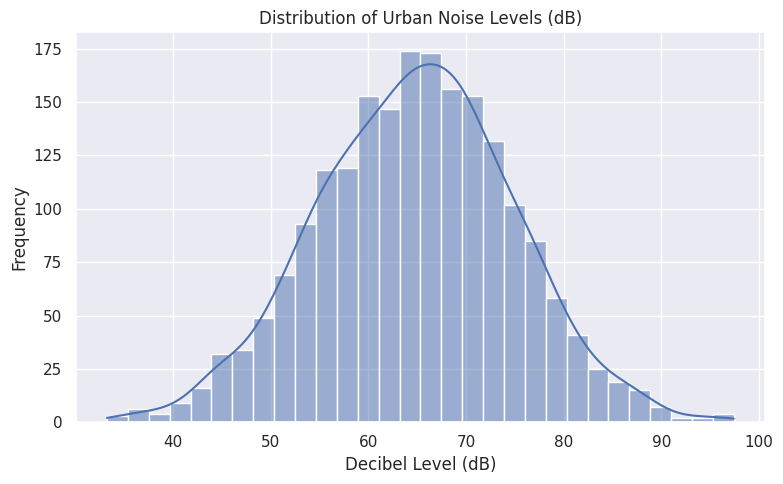

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df["decibel_level"], bins=30, kde=True)
plt.title("Distribution of Urban Noise Levels (dB)")
plt.xlabel("Decibel Level (dB)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### Histogram of Noise Levels

This histogram shows the distribution of the `decibel_level` variable. The noise levels are roughly centered in the mid-60s decibel range, with most values falling between about 55 dB and 75 dB. The distribution has a moderate spread, with some quieter observations in the low 40s and a smaller number of very loud observations in the 80–90+ dB range. Overall, the plot suggests that typical urban noise in this dataset is in the mid-range, with relatively few extreme high-noise events.


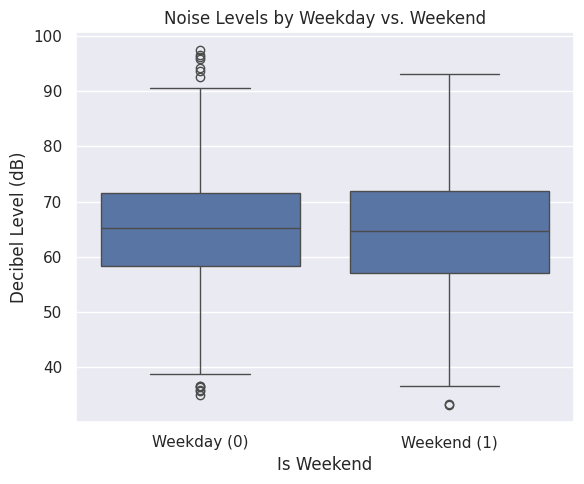

In [7]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="is_weekend", y="decibel_level")
plt.xticks([0, 1], ["Weekday (0)", "Weekend (1)"])
plt.title("Noise Levels by Weekday vs. Weekend")
plt.xlabel("Is Weekend")
plt.ylabel("Decibel Level (dB)")
plt.tight_layout()
plt.show()


#### Visualization 2 – Boxplot of Noise by Weekday vs. Weekend

This boxplot compares the distribution of `decibel_level` between weekdays (`is_weekend = 0`) and weekends (`is_weekend = 1`). The median noise levels for both categories are fairly similar, with slightly higher typical levels on weekdays. The interquartile ranges overlap substantially, and both groups have some high-noise outliers. This suggests that, in this dataset, weekends are **not dramatically quieter** than weekdays, though there may be a small tendency for weekday noise to be slightly higher on average.


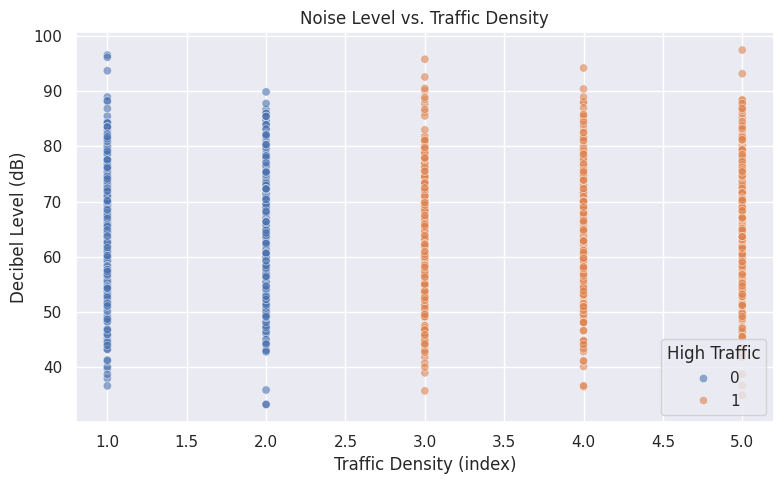

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="traffic_density",
    y="decibel_level",
    hue="high_traffic",
    alpha=0.6
)
plt.title("Noise Level vs. Traffic Density")
plt.xlabel("Traffic Density (index)")
plt.ylabel("Decibel Level (dB)")
plt.legend(title="High Traffic")
plt.tight_layout()
plt.show()


#### Visualization 3 – Scatterplot of Noise vs. Traffic Density

This scatterplot shows the relationship between `traffic_density` (an index of how busy the traffic is) and `decibel_level`, with points colored by the `high_traffic` indicator. The points are fairly spread out with no strong linear pattern, although many of the higher traffic density observations correspond to moderately higher noise values. Overall, the relationship appears weak or noisy: traffic density is one factor in urban noise, but not the only determinant in this simulated dataset.


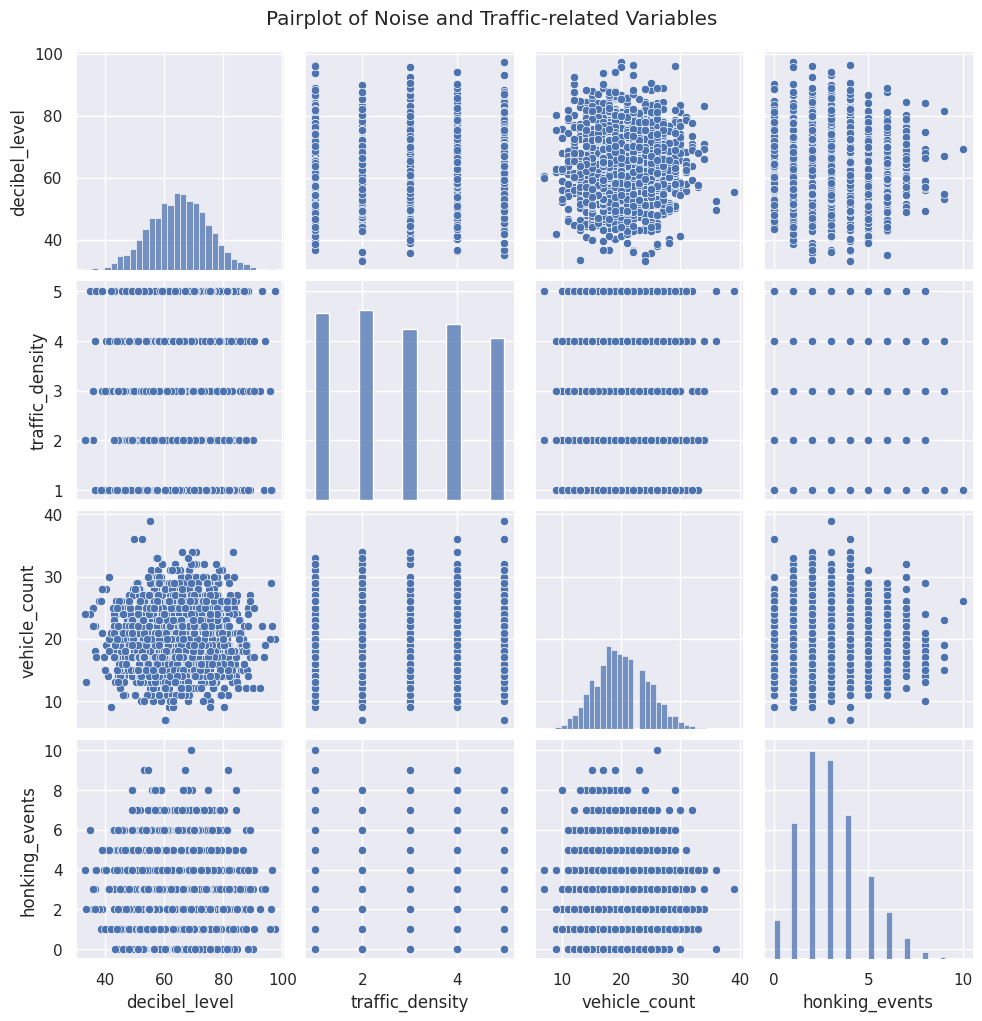

In [9]:
subset_cols = ["decibel_level", "traffic_density", "vehicle_count", "honking_events"]
sns.pairplot(df[subset_cols], diag_kind="hist")
plt.suptitle("Pairplot of Noise and Traffic-related Variables", y=1.02)
plt.show()


multivariate view of decibel_level, traffic_density, vehicle_count, and honking_events. The diagonal histograms show the individual distributions of each variable, while the off-diagonal scatterplots show pairwise relationships.

Nonparametric Inference of the Median (Bootstrap)


In [10]:
# Set a seed for reproducibility
np.random.seed(42)

# Take about 10% of the rows (200 out of 2000)
sample_frac = 0.10
sample_df = df.sample(frac=sample_frac, random_state=42)

sample_size = sample_df.shape[0]
sample_size


200

In [12]:
# Number of bootstrap resamples
B = 5000

boot_medians = np.empty(B)

# Vector of noise levels from the sample
sample_noise = sample_df["decibel_level"].values

for b in range(B):
    # Resample with replacement from the sample
    resample = np.random.choice(sample_noise, size=sample_size, replace=True)
    boot_medians[b] = np.median(resample)

# Compute the 95% percentile-based confidence interval
ci_lower, ci_upper = np.percentile(boot_medians, [2.5, 97.5])

sample_median = np.median(sample_noise)

sample_median, ci_lower, ci_upper


(np.float64(67.04640424422524),
 np.float64(65.8043814221612),
 np.float64(68.3802348110171))

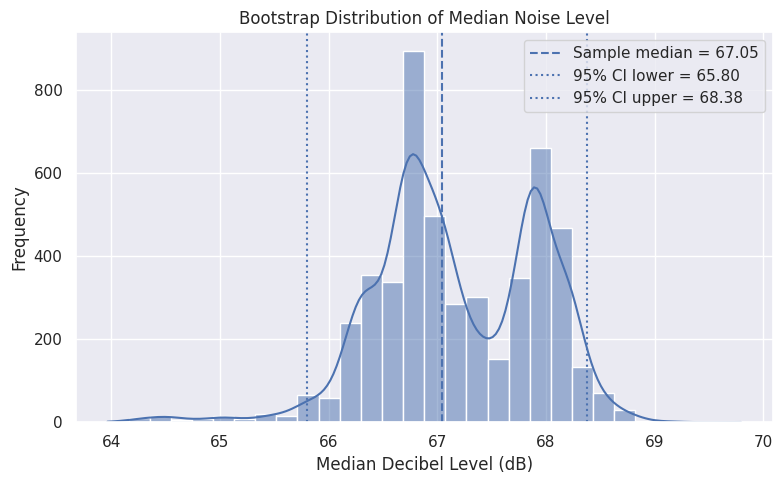

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(boot_medians, bins=30, kde=True)
plt.axvline(sample_median, linestyle="--", label=f"Sample median = {sample_median:.2f}")
plt.axvline(ci_lower, linestyle=":", label=f"95% CI lower = {ci_lower:.2f}")
plt.axvline(ci_upper, linestyle=":", label=f"95% CI upper = {ci_upper:.2f}")
plt.title("Bootstrap Distribution of Median Noise Level")
plt.xlabel("Median Decibel Level (dB)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


Take a random sample of about 10% of the data (200 rows).

Compute the sample median of decibel_level.

Use bootstrapping (resampling with replacement) to estimate the sampling distribution of the median.

Compute a 95% confidence interval using the percentile method.